<a href="https://colab.research.google.com/github/BharatXBhalla/Deep-Learning-CDAC/blob/main/Cnn/cnn_cidar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [6]:
y_train.shape

(50000, 10)

In [7]:
import keras
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential


In [17]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,kernel_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer ="sgd",
              metrics = ['accuracy'])



model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 31, 31, 64)        832       
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         131328    
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                      

In [15]:
batch_size = 32
epochs = 10

In [18]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 60s 17ms/step - loss: 2.3084 - accuracy: 0.0992 - val_loss: 2.3172 - val_accuracy: 0.0990
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.1918 - accuracy: 0.1753 - val_loss: 1.9892 - val_accuracy: 0.2895
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7649 - accuracy: 0.3650 - val_loss: 1.5681 - val_accuracy: 0.4394
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4423 - accuracy: 0.4900 - val_loss: 1.3480 - val_accuracy: 0.5237
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2506 - accuracy: 0.5639 - val_loss: 1.2569 - val_accuracy: 0.5644
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1256 - accuracy: 0.6098 - val_loss: 1.2053 - val_accuracy: 0.5817
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0334 - accuracy: 0.6406 - val_loss: 1.1748 -

In [19]:
import matplotlib.pyplot as plt


In [21]:
score = model.evaluate(x_test, y_test, verbose=0)

In [22]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0155786275863647
Test accuracy: 0.6531999707221985


In [23]:
history_dict = history.history


In [24]:
history_dict

{'accuracy': [0.09916000068187714,
  0.1752600073814392,
  0.36504000425338745,
  0.4900200068950653,
  0.5638999938964844,
  0.6097999811172485,
  0.6405799984931946,
  0.6700400114059448,
  0.6923199892044067,
  0.7150999903678894],
 'loss': [2.3084499835968018,
  2.1918013095855713,
  1.7649070024490356,
  1.4422897100448608,
  1.2506380081176758,
  1.1256368160247803,
  1.0334111452102661,
  0.9540119767189026,
  0.888835608959198,
  0.8224016427993774],
 'val_accuracy': [0.0989999994635582,
  0.28949999809265137,
  0.43939998745918274,
  0.5236999988555908,
  0.5644000172615051,
  0.5817000269889832,
  0.5877000093460083,
  0.6384999752044678,
  0.6507999897003174,
  0.6531999707221985],
 'val_loss': [2.3172051906585693,
  1.9892308712005615,
  1.5680880546569824,
  1.3480315208435059,
  1.2569091320037842,
  1.2052968740463257,
  1.1748485565185547,
  1.0427584648132324,
  1.0157530307769775,
  1.0155786275863647]}

Text(0, 0.5, 'Loss')

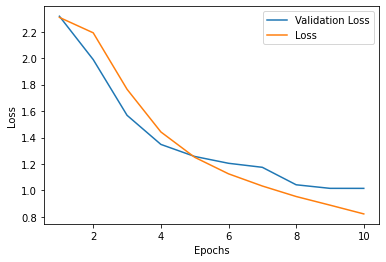

In [26]:
loss_history = history_dict['loss']
val_loss_history = history_dict['val_loss']
epochs = range(1,len(loss_history)+1)

plt.plot(epochs,val_loss_history,label = "Validation Loss")
plt.plot(epochs,loss_history,label="Loss")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

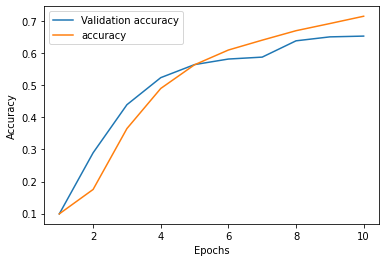

In [28]:
accuracy_history = history_dict['accuracy']
val_accuracy_history = history_dict['val_accuracy']
epochs = range(1,len(accuracy_history)+1)

plt.plot(epochs,val_accuracy_history,label = "Validation accuracy")
plt.plot(epochs,accuracy_history,label="accuracy")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [29]:
model.save("cidar_10.h5")

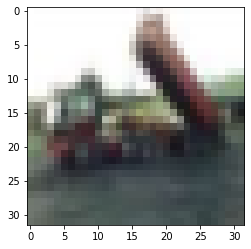

In [31]:
plt.imshow(x_train[2])

In [33]:
from keras.models import load_model

classifier = load_model('cidar_10.h5')

In [37]:
classifier.predict(x_train[2].reshape(1,32,32,3))

array([[0.01596627, 0.00737971, 0.01662808, 0.17715381, 0.01657429,
        0.01086025, 0.08007378, 0.05617663, 0.09157428, 0.52761286]],
      dtype=float32)

In [38]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

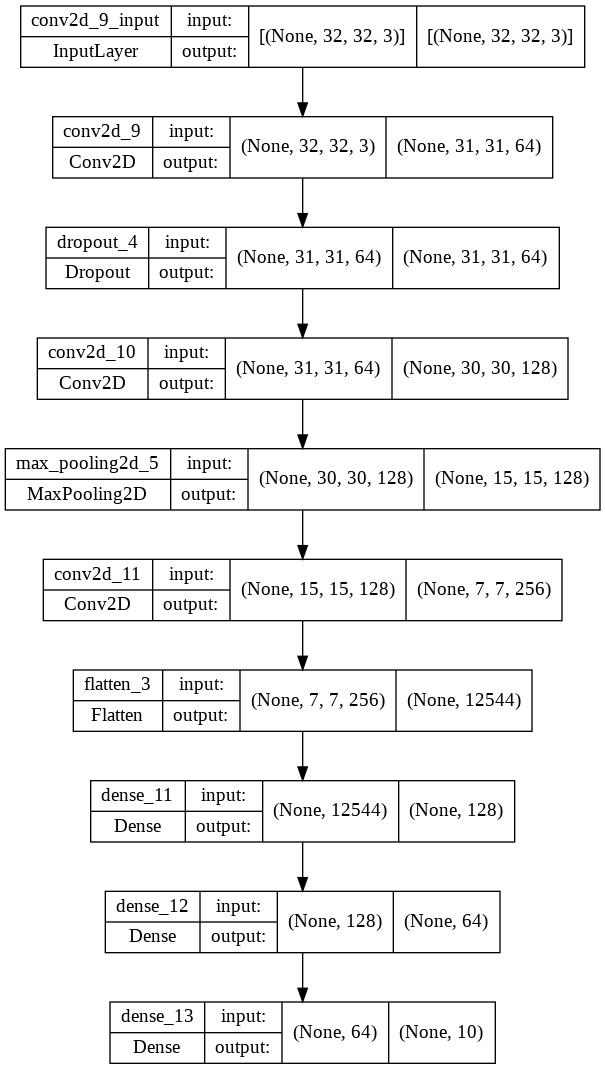

In [39]:
from keras.utils.vis_utils import plot_model

# Generate the plot
plot_model(model, to_file = 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)